# 규제가 있는 선형회귀 - 릿지, 라쏘, 엘라스틱넷 회귀

#### 규제가 있는 모델 구축 - 당뇨병 데이터세트
#### 1. 데이터 전처리
#### 2. Ridge, Lasso, Elasticnet regression 구축: 회귀 계수 확인, 하이퍼 파라미터 탐색
#### 3. 교차 검증으로 최적의 하이퍼파라미터 탐색: LassoCV()

In [1]:
# 관련 라이브러리 및 모듈 Import
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

# 0. 데이터 수집, 탐색, 준비

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

diab = load_diabetes()


####  데이터셋에 대한 설명 및 정보 확인

In [5]:
# 데이터셋 정보확인

In [6]:
print(diab.DESCR) #이미 스케일링 되어 있음을 확인할 것

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [8]:
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
diab.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

#### 데이터프레임 변환

In [10]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환

In [11]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# diab_df생성
# diab_df.head() 데이터 5개 확인

diab_df = pd.DataFrame(diab.data, columns = diab.feature_names)
diab_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [12]:
diab_df.shape

(442, 10)

In [9]:
diab_df.info() # 누락치 확인,  data type 확인 ->  isnull().sum(), target에 결측값이 있으면 해당 관측치 제거

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [14]:
diab_df['measure'] = diab.target
diab_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


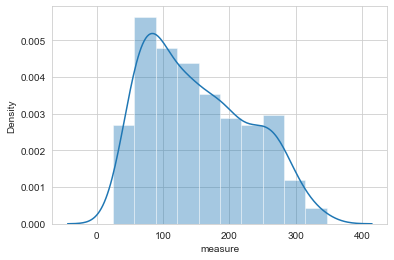

In [15]:
import seaborn as sns
sns.set_style('whitegrid')
f = sns.distplot(diab_df['measure'])


In [16]:
# X(독립변수), Y(종속변수) 분할
X = diab_df.drop(['measure'], axis=1)
y = diab_df['measure']

In [17]:
# 학습용, 평가용 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,random_state=42)

# 모델별 계수변화, 알파별 계수 비교 데이터프레임(comp_df)

In [18]:
#각 모델별 계수로 이루어진 데이터프레임 준비
comp_df = pd.DataFrame(index=(diab.feature_names) + ["score"])

In [19]:
#각 모델별, 규제강도별 평가지표 저장
diab.feature_names + ["score"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'score']

In [20]:
comp_df

""
age
sex
bmi
bp
s1
s2
s3
s4
s5
s6


# 1. 규제가 없는 선형모델

In [23]:
#모델 구축 및 학습
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

#모델 평가
y_pred = model_LR.predict(X_test)
r2 = r2_score(y_test, y_pred)

# 회귀 계수 확인
coef = pd.Series(model_LR.coef_, index=X_test.columns)

print("R2: {:.3f} \n".format(r2))
print(coef)

R2: 0.477 

age     29.250346
sex   -261.707681
bmi    546.297373
bp     388.400773
s1    -901.953387
s2     506.761149
s3     121.148459
s4     288.029325
s5     659.271338
s6      41.375369
dtype: float64


- 계수값 시각화

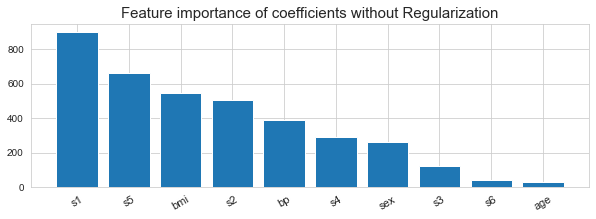

In [24]:
coef = pd.Series(data=np.abs(model_LR.coef_), index=X_test.columns).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title('Feature importance of coefficients without Regularization', fontsize=15)
plt.bar(coef.index, coef.values, align='center')
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [30]:
# 모델별 비교 데이터프레임 열 추가
comp_df['LR'] = np.append(model_LR.coef_, r2 )
comp_df

,LR
age,29.250346
sex,-261.707681
bmi,546.297373
bp,388.400773
s1,-901.953387
s2,506.761149
s3,121.148459
s4,288.029325
s5,659.271338
s6,41.375369


# 1. 릿지 모델

In [31]:
from sklearn.linear_model import Ridge

In [32]:
# 릿지 선형회귀 모델 평가: model_Ridge1, alpha=1

# a=1일때 회귀 계수 확인
model_Ridge1 = Ridge(alpha=1)

model_Ridge1.fit(X_train, y_train)


Ridge(alpha=1)

In [33]:
# 선형 모델 평가
y_pred = model_Ridge1.predict(X_test)

r2 = r2_score(y_test, y_pred)

#a = 1 릿지 모델 회귀 계수

coef = pd.Series(model_Ridge1.coef_, index=X_test.columns)
print("R2: {:.3f}".format(r2))
print(coef)

R2: 0.423
age     45.053767
sex    -71.947551
bmi    280.715875
bp     195.213699
s1      -2.229433
s2     -17.541159
s3    -148.688994
s4     120.467093
s5     198.614859
s6     106.934534
dtype: float64


- 계수값 시각화

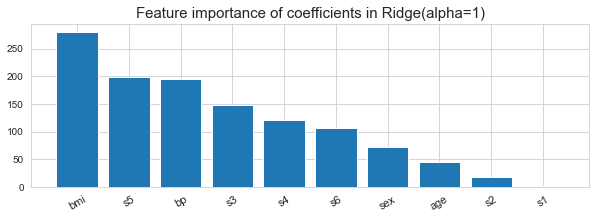

In [34]:
coef = pd.Series(data=np.abs(model_Ridge1.coef_), index=X_test.columns).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title('Feature importance of coefficients in Ridge(alpha=1)', fontsize=15)
plt.bar(coef.index, coef.values, align='center')
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [35]:
# alpha_list=[0.01, 1, 10, 100]인 경우

alpha_list = [0.01, 1, 10, 100]
for alpha in alpha_list:
    model_Ridge = Ridge(alpha=alpha)
    model_Ridge.fit(X_train, y_train)
    
    y_pred = model_Ridge.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    col_name = 'Ridge(alpha={:.2f})'.format(alpha)
    comp_df[col_name] = np.append(model_Ridge.coef_, r2)

comp_df
    

,LR,Ridge(alpha=0.01),Ridge(alpha=1.00),Ridge(alpha=10.00),Ridge(alpha=100.00)
age,29.250346,34.164603,45.053767,16.230871,2.072848
sex,-261.707681,-254.044322,-71.947551,-2.961374,-0.003808
bmi,546.297373,550.842404,280.715875,59.524146,6.899915
bp,388.400773,379.130249,195.213699,43.421500,5.085125
s1,-901.953387,-404.246797,-2.229433,13.875065,2.069660
s2,506.761149,123.024271,-17.541159,10.865253,1.743747
s3,121.148459,-99.046718,-148.688994,-37.495849,-4.508876
s4,288.029325,215.029206,120.467093,38.728531,4.902421
s5,659.271338,463.843218,198.614859,49.224775,5.926497
s6,41.375369,50.350550,106.934534,34.737979,4.328698


# 2. 라쏘 모델

In [36]:
from sklearn.linear_model import Lasso

# alpha = 1
model_Lasso1 = Lasso(alpha=1)

model_Lasso1.fit(X_train, y_train)

Lasso(alpha=1)

In [37]:
# 라쏘 선형회귀 모델 평가(alpha=1)
# 선형 모델 평가
y_pred = model_Lasso1.predict(X_test)

r2 = r2_score(y_test, y_pred)

#a = 1 라쏘 모델 회귀 계수

coef = pd.Series(model_Lasso1.coef_, index=X_test.columns)
print("R2: {:.3f}".format(r2))
print(coef)

R2: 0.362
age      0.000000
sex     -0.000000
bmi    443.702165
bp      51.603401
s1       0.000000
s2       0.000000
s3      -0.000000
s4       0.000000
s5     201.967127
s6       0.000000
dtype: float64


- 계수 시각화

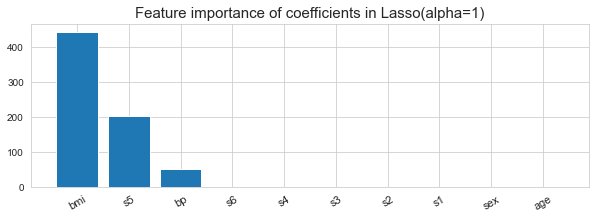

In [38]:
coef = pd.Series(data=np.abs(model_Lasso1.coef_), index=X_test.columns).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title('Feature importance of coefficients in Lasso(alpha=1)', fontsize=15)
plt.bar(coef.index, coef.values, align='center')
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [39]:
# alpha_list=[0.01, 1, 10, 100]인 경우
alpha_list = [0.01, 1, 10, 100]
for alpha in alpha_list:
    model_Lasso = Lasso(alpha=alpha)
    model_Lasso.fit(X_train, y_train)
    
    y_pred = model_Lasso.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    col_name = 'Lasso(alpha={:.2f})'.format(alpha)
    comp_df[col_name] = np.append(model_Lasso.coef_, r2)

comp_df
    

,LR,Ridge(alpha=0.01),Ridge(alpha=1.00),Ridge(alpha=10.00),Ridge(alpha=100.00),Lasso(alpha=0.01),Lasso(alpha=1.00),Lasso(alpha=10.00),Lasso(alpha=100.00)
age,29.250346,34.164603,45.053767,16.230871,2.072848,28.243511,0.000000,0.000000,0.000000
sex,-261.707681,-254.044322,-71.947551,-2.961374,-0.003808,-250.820194,-0.000000,0.000000,0.000000
bmi,546.297373,550.842404,280.715875,59.524146,6.899915,556.213504,443.702165,0.000000,0.000000
bp,388.400773,379.130249,195.213699,43.421500,5.085125,380.662908,51.603401,0.000000,0.000000
s1,-901.953387,-404.246797,-2.229433,13.875065,2.069660,-468.724831,0.000000,0.000000,0.000000
s2,506.761149,123.024271,-17.541159,10.865253,1.743747,166.982612,0.000000,0.000000,0.000000
s3,121.148459,-99.046718,-148.688994,-37.495849,-4.508876,-60.228572,-0.000000,-0.000000,-0.000000
s4,288.029325,215.029206,120.467093,38.728531,4.902421,230.910912,0.000000,0.000000,0.000000
s5,659.271338,463.843218,198.614859,49.224775,5.926497,492.632152,201.967127,0.000000,0.000000
s6,41.375369,50.350550,106.934534,34.737979,4.328698,43.968404,0.000000,0.000000,0.000000


# 3. 엘라스틱넷 모델

In [40]:
from sklearn.linear_model import ElasticNet

# 모델 구축 및 학습(alpha=1, l1_ratio=0.5)
model_ElasticNet1 = ElasticNet(alpha=1, l1_ratio=0.5)

model_ElasticNet1.fit(X_train, y_train)

ElasticNet(alpha=1)

In [41]:
#모델 평가 및 회귀 계수 확인
# 엘라스틱넷 선형회귀 모델 평가(alpha=1, L1_ratio=0.5)
# 선형 모델 평가
y_pred = model_ElasticNet1.predict(X_test)

r2 = r2_score(y_test, y_pred)

#a = 1 엘라스틱넷 모델 회귀 계수

coef = pd.Series(model_ElasticNet1.coef_, index=X_test.columns)
print("R2: {:.3f}".format(r2))
print(coef)

R2: 0.003
age    0.367567
sex    0.000000
bmi    3.512046
bp     2.328663
s1     0.380194
s2     0.168337
s3    -1.955958
s4     2.228128
s5     2.887428
s6     1.846225
dtype: float64


- 계수 시각화

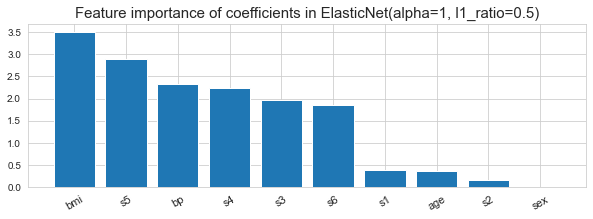

In [42]:
coef = pd.Series(data=np.abs(model_ElasticNet1.coef_), index=X_test.columns).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title('Feature importance of coefficients in ElasticNet(alpha=1, l1_ratio=0.5)', fontsize=15)
plt.bar(coef.index, coef.values, align='center')
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [44]:
# alpha_list=[0.01, 1, 10, 100]인 경우, l1_ratio=0.5 

alpha_list = [0.01, 1, 10, 100]
for alpha in alpha_list:
    model_ElasticNet = ElasticNet(alpha=alpha)
    model_ElasticNet.fit(X_train, y_train)
    
    y_pred = model_ElasticNet.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    col_name = 'ElasticNet(alpha={:.2f}, l1_ratio=0.5) '.format(alpha)
    comp_df[col_name] = np.append(model_ElasticNet.coef_, r2)

comp_df

,LR,Ridge(alpha=0.01),Ridge(alpha=1.00),Ridge(alpha=10.00),Ridge(alpha=100.00),Lasso(alpha=0.01),Lasso(alpha=1.00),Lasso(alpha=10.00),Lasso(alpha=100.00),"ElasticNet(alpha=0.01, l1_ratio=0.5)","ElasticNet(alpha=1.00, l1_ratio=0.5)","ElasticNet(alpha=10.00, l1_ratio=0.5)","ElasticNet(alpha=100.00, l1_ratio=0.5)"
age,29.250346,34.164603,45.053767,16.230871,2.072848,28.243511,0.000000,0.000000,0.000000,41.417724,0.367567,0.000000,0.000000
sex,-261.707681,-254.044322,-71.947551,-2.961374,-0.003808,-250.820194,-0.000000,0.000000,0.000000,-45.935113,0.000000,0.000000,0.000000
bmi,546.297373,550.842404,280.715875,59.524146,6.899915,556.213504,443.702165,0.000000,0.000000,225.053239,3.512046,0.000000,0.000000
bp,388.400773,379.130249,195.213699,43.421500,5.085125,380.662908,51.603401,0.000000,0.000000,158.163986,2.328663,0.000000,0.000000
s1,-901.953387,-404.246797,-2.229433,13.875065,2.069660,-468.724831,0.000000,0.000000,0.000000,9.020973,0.380194,0.000000,0.000000
s2,506.761149,123.024271,-17.541159,10.865253,1.743747,166.982612,0.000000,0.000000,0.000000,-1.762251,0.168337,0.000000,0.000000
s3,121.148459,-99.046718,-148.688994,-37.495849,-4.508876,-60.228572,-0.000000,-0.000000,-0.000000,-124.240088,-1.955958,-0.000000,-0.000000
s4,288.029325,215.029206,120.467093,38.728531,4.902421,230.910912,0.000000,0.000000,0.000000,106.910019,2.228128,0.000000,0.000000
s5,659.271338,463.843218,198.614859,49.224775,5.926497,492.632152,201.967127,0.000000,0.000000,165.006394,2.887428,0.000000,0.000000
s6,41.375369,50.350550,106.934534,34.737979,4.328698,43.968404,0.000000,0.000000,0.000000,97.213373,1.846225,0.000000,0.000000


In [45]:
comp_df.T

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,score
LR,29.250346,-261.707681,546.297373,388.400773,-901.953387,506.761149,121.148459,288.029325,659.271338,41.375369,0.477292
Ridge(alpha=0.01),34.164603,-254.044322,550.842404,379.130249,-404.246797,123.024271,-99.046718,215.029206,463.843218,50.350550,0.477674
Ridge(alpha=1.00),45.053767,-71.947551,280.715875,195.213699,-2.229433,-17.541159,-148.688994,120.467093,198.614859,106.934534,0.423345
Ridge(alpha=10.00),16.230871,-2.961374,59.524146,43.421500,13.875065,10.865253,-37.495849,38.728531,49.224775,34.737979,0.151566
Ridge(alpha=100.00),2.072848,-0.003808,6.899915,5.085125,2.069660,1.743747,-4.508876,4.902421,5.926497,4.328698,0.014770
Lasso(alpha=0.01),28.243511,-250.820194,556.213504,380.662908,-468.724831,166.982612,-60.228572,230.910912,492.632152,43.968404,0.478716
Lasso(alpha=1.00),0.000000,-0.000000,443.702165,51.603401,0.000000,0.000000,-0.000000,0.000000,201.967127,0.000000,0.361899
Lasso(alpha=10.00),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.006405
Lasso(alpha=100.00),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.006405
"ElasticNet(alpha=0.01, l1_ratio=0.5)",41.417724,-45.935113,225.053239,158.163986,9.020973,-1.762251,-124.240088,106.910019,165.006394,97.213373,0.384438


### LassoCV() : k-폴드 교차 검증으로 최적의 Lasso 모델 하이퍼파라미터 alpha 찾기

In [46]:
#LassoCV()에 필요한 매개변수 설정
#0.01 ~ 9.91 까지 alpha_list  생성

cv = 5
max_iter = 5000
alpha_list = np.arange(0.01, 10, 0.01)


In [47]:
alpha_list

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.

- 모델 학습

In [48]:
model_Lasso = LassoCV(alphas=alpha_list, cv=cv, n_jobs=-1, random_state=1, max_iter=max_iter)
model_Lasso.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67...
       9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45, 9.46,
       9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57,
       9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68,
       9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.79,
       9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9 ,
       9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99]),
        cv=5, max_iter=5000, n_jobs=-1, random_state=1)

In [49]:
model_Lasso.alpha_

0.01